<a href="https://colab.research.google.com/github/jahanshukhy/Intro-to-Machine-Learning/blob/main/HW3_2a2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
#2a (without adding any weight)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Load cancer dataset
from sklearn import datasets
dataset = datasets.load_breast_cancer()
X = dataset.data
Y = dataset.target
target_names = dataset.target_names

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report)

In [147]:
classifier = LogisticRegression(solver="liblinear", penalty="l2", C=1.0, max_iter=1000, random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [148]:
Y_pred = classifier.predict(X_test)

In [149]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[40,  2],
       [ 0, 72]])

In [150]:
#Evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0
F1 Score: 0.9863013698630136


Text(0.5, 427.9555555555555, 'Predicted label')

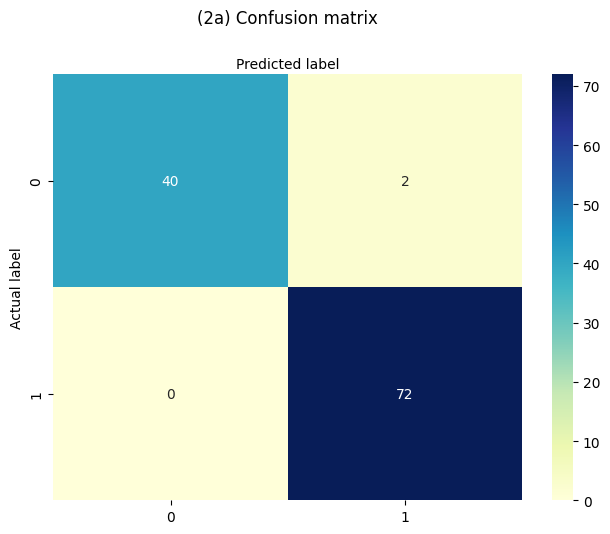

In [151]:
#Visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('(2a) Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

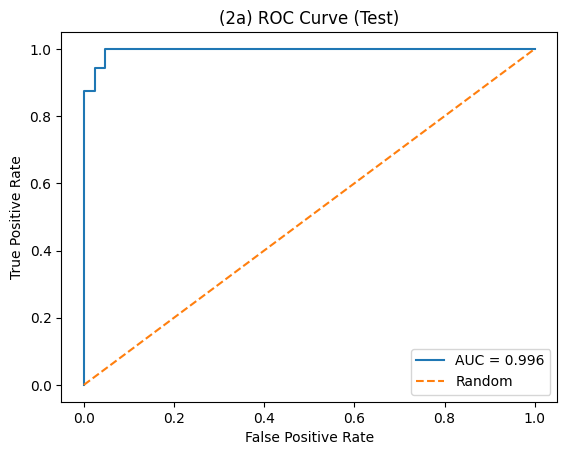

In [152]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC for the liblinear LogisticRegression classifier
y_score_lr = classifier.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_score_lr)
auc_lr = roc_auc_score(Y_test, y_score_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.3f}")
plt.plot([0,1], [0,1], "--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("(2a) ROC Curve (Test)")
plt.legend(loc="lower right")
plt.show()

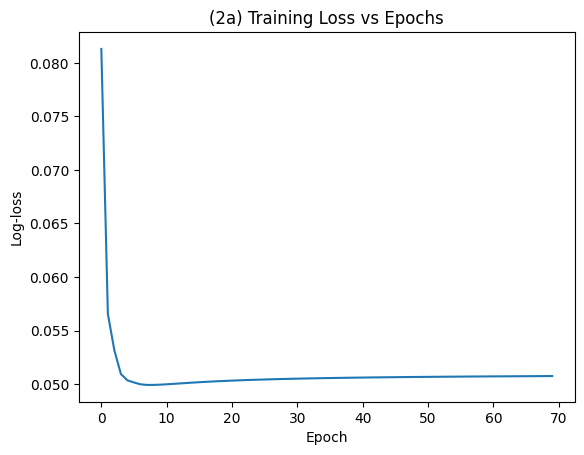

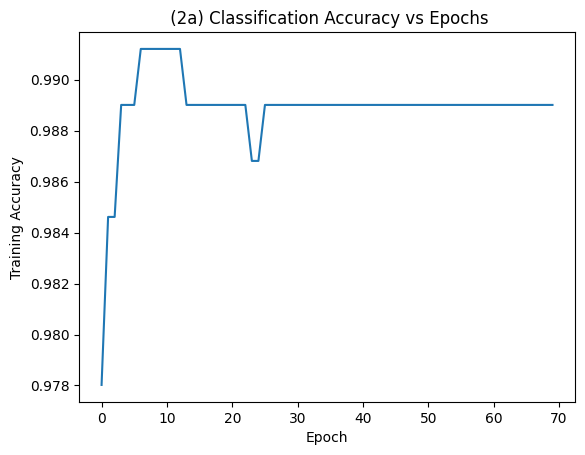

In [153]:
# Loss and Training accuracy
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

classes = np.array([0, 1])
sgd = SGDClassifier(
    loss="log_loss", penalty="l2", alpha=1.0/len(X_train), # alpha ≈ 1 / (C * X_train), to match with liblinear regularization
    learning_rate="optimal", random_state=0
)
EPOCHS = 70
loss_hist = []
acc_hist  = []

sgd.partial_fit(X_train, Y_train, classes=classes)

for epoch in range(EPOCHS):
    sgd.partial_fit(X_train, Y_train)
    p_train = sgd.predict_proba(X_train)[:, 1]
    yhat_tr = (p_train >= 0.5).astype(int)
    loss_hist.append(log_loss(Y_train, p_train, labels=classes))
    acc_hist.append((yhat_tr == Y_train).mean())

plt.figure()
plt.plot(loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Log-loss")
plt.title("(2a) Training Loss vs Epochs")
plt.show()

plt.figure()
plt.plot(acc_hist)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title(" (2a) Classification Accuracy vs Epochs")
plt.show()

In [154]:
# 2b (adding weight penalty)

wp = X_train.shape[1] #number of parameters=30
C_penalized = 1.0 / wp

classifier_b = LogisticRegression(solver='liblinear', penalty='l2', C=C_penalized, random_state=0, max_iter=1000)
classifier_b.fit(X_train, Y_train)

Y_pred_b = classifier_b.predict(X_test)
cnf_matrix_b = confusion_matrix(Y_test, Y_pred_b)
cnf_matrix_b

array([[39,  3],
       [ 0, 72]])

In [155]:
print(f"\n=== (b) With weight penalty ")
print("Accuracy:",  metrics.accuracy_score(Y_test, Y_pred_b))
print("Precision:", metrics.precision_score(Y_test, Y_pred_b))
print("Recall:",    metrics.recall_score(Y_test, Y_pred_b))
print("F1 Score:",  metrics.f1_score(Y_test, Y_pred_b))


=== (b) With weight penalty 
Accuracy: 0.9736842105263158
Precision: 0.96
Recall: 1.0
F1 Score: 0.9795918367346939


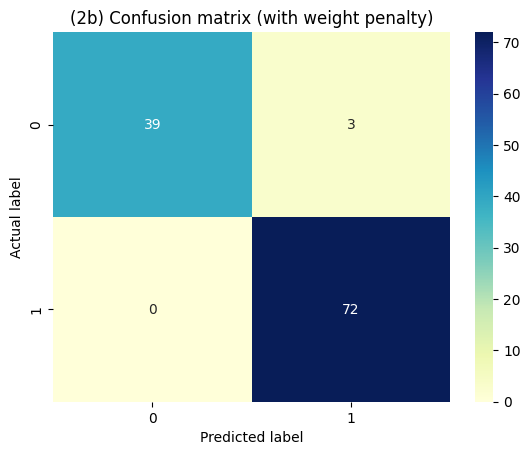

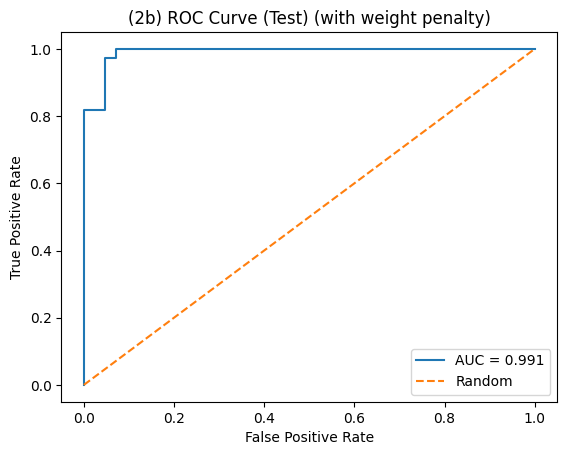

In [156]:
plt.figure()
sns.heatmap(pd.DataFrame(cnf_matrix_b), annot=True, cmap="YlGnBu", fmt='g')
plt.title('(2b) Confusion matrix (with weight penalty)'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
plt.show()

y_score_lr_b = classifier_b.predict_proba(X_test)[:, 1]
fpr_lr_b, tpr_lr_b, _ = roc_curve(Y_test, y_score_lr_b)
auc_lr_b = roc_auc_score(Y_test, y_score_lr_b)

plt.figure()
plt.plot(fpr_lr_b, tpr_lr_b, label=f"AUC = {auc_lr_b:.3f}")
plt.plot([0,1],[0,1],"--", label="Random")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("(2b) ROC Curve (Test) (with weight penalty)"); plt.legend(loc="lower right")
plt.show()

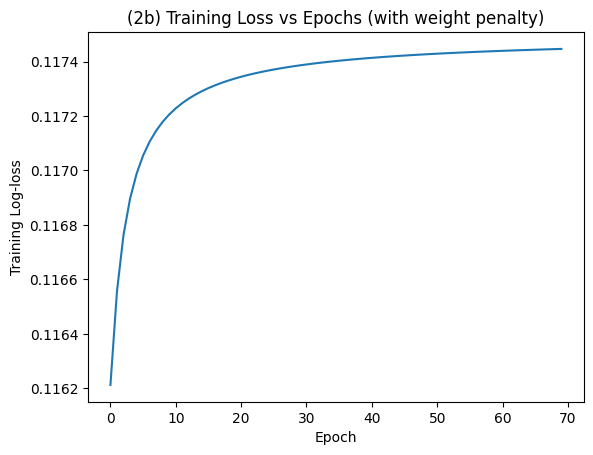

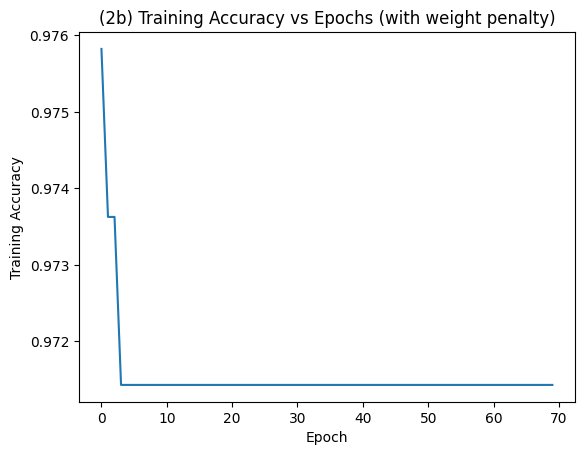

In [157]:
#loss and training accuracy
alpha_b = 1.0 / (C_penalized * len(X_train))

classes = np.array([0, 1])
sgd_b = SGDClassifier(
    loss="log_loss", penalty="l2",
    alpha=alpha_b,
    learning_rate="optimal",
    random_state=0
)

EPOCHS_B = 70
loss_hist_b, acc_hist_b = [], []

sgd_b.partial_fit(X_train, Y_train, classes=classes)

for _ in range(EPOCHS_B):
    sgd_b.partial_fit(X_train, Y_train)
    p_train_b = sgd_b.predict_proba(X_train)[:, 1]
    yhat_tr_b = (p_train_b >= 0.5).astype(int)
    loss_hist_b.append(log_loss(Y_train, p_train_b, labels=classes))
    acc_hist_b.append((yhat_tr_b == Y_train).mean())

plt.figure()
plt.plot(loss_hist_b)
plt.xlabel("Epoch")
plt.ylabel("Training Log-loss")
plt.title("(2b) Training Loss vs Epochs (with weight penalty)")
plt.show()

plt.figure()
plt.plot(acc_hist_b)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("(2b) Training Accuracy vs Epochs (with weight penalty)")
plt.show()